<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-Process-text-data-on-Twitter-data" data-toc-modified-id="Python-Process-text-data-on-Twitter-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Process text data on Twitter data</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-reivew" data-toc-modified-id="Data-reivew-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data reivew</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Drop-useless-columns" data-toc-modified-id="Drop-useless-columns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Drop useless columns</a></span></li><li><span><a href="#Extract-text-data" data-toc-modified-id="Extract-text-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Extract text data</a></span></li><li><span><a href="#text-pipline" data-toc-modified-id="text-pipline-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>text pipline</a></span></li><li><span><a href="#cleaned-text-sample" data-toc-modified-id="cleaned-text-sample-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>cleaned text sample</a></span></li><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Vectorization</a></span><ul class="toc-item"><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>CountVectorizer</a></span></li><li><span><a href="#Word-count" data-toc-modified-id="Word-count-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Word count</a></span></li></ul></li></ul></li><li><span><a href="#Wordcould" data-toc-modified-id="Wordcould-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Wordcould</a></span></li></ul></div>

# Stage 1

# Introduction

Author: Cholian Li

Date: 2021/09/28

Data sources: data_twitter.csv

# Libraries

In [519]:
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import pandas as pd

In [520]:
ori_data = pd.read_csv('data/data_twitter.csv',index_col=0)

In [521]:
ori_data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,915225464230334464,1436479568483954688,1631318392,EnrichedFeed,"Bitcoin, Ethereum and Solana Prices Slip�<U+00...",bFol05,284,NaN,NaN,NaN,...,60018,104905,1507041729,False,https://t.co/CiSQWfSBUP,https://www.enrichedfeed.com,NaN,https://pbs.twimg.com/profile_banners/91522546...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136016670...
1,915225464230334464,1436478311711051791,1631318092,EnrichedFeed,C98/USD price expected to dip to $3.5 in the n...,bFol05,271,NaN,NaN,NaN,...,60018,104905,1507041729,False,https://t.co/CiSQWfSBUP,https://www.enrichedfeed.com,NaN,https://pbs.twimg.com/profile_banners/91522546...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136016670...
2,915225464230334464,1436468760475574316,1631315815,EnrichedFeed,Aave founder sells �<U+0080><U+0098>Yield�<U+0...,bFol05,274,NaN,NaN,NaN,...,60018,104905,1507041729,False,https://t.co/CiSQWfSBUP,https://www.enrichedfeed.com,NaN,https://pbs.twimg.com/profile_banners/91522546...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136016670...
3,915225464230334464,1436469517174116364,1631315995,EnrichedFeed,Is the Crypto Market Correction Good or Bad fo...,bFol05,271,NaN,NaN,NaN,...,60018,104905,1507041729,False,https://t.co/CiSQWfSBUP,https://www.enrichedfeed.com,NaN,https://pbs.twimg.com/profile_banners/91522546...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136016670...
4,915225464230334464,1436478217444069379,1631318070,EnrichedFeed,Undaunted by Bitcoin �<U+0080><U+0098>flash cr...,bFol05,277,NaN,NaN,NaN,...,60018,104905,1507041729,False,https://t.co/CiSQWfSBUP,https://www.enrichedfeed.com,NaN,https://pbs.twimg.com/profile_banners/91522546...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136016670...


In [522]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40120 entries, 0 to 40119
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  40120 non-null  int64  
 1   status_id                40120 non-null  int64  
 2   created_at               40120 non-null  int64  
 3   screen_name              40120 non-null  object 
 4   text                     40120 non-null  object 
 5   source                   40120 non-null  object 
 6   display_text_width       40120 non-null  int64  
 7   reply_to_status_id       11025 non-null  float64
 8   reply_to_user_id         11986 non-null  float64
 9   reply_to_screen_name     11986 non-null  object 
 10  is_quote                 40120 non-null  bool   
 11  is_retweet               40120 non-null  bool   
 12  favorite_count           40120 non-null  int64  
 13  retweet_count            40120 non-null  int64  
 14  quote_count           

# Data cleaning

## Drop useless columns

In [523]:
useful_cols = ['created_at','text','hashtags','lang','location','description']

data = ori_data[useful_cols].copy()

data.head()

,created_at,text,hashtags,lang,location,description
0,1631318392,"Bitcoin, Ethereum and Solana Prices Slip�<U+00...","c(""crypto"", ""cryptocurrency"", ""crypto"", ""altse...",en,United States,"Crypto Research and investing news\r\n$ada, $b..."
1,1631318092,C98/USD price expected to dip to $3.5 in the n...,"c(""crypto"", ""cryptocurrency"", ""crypto"", ""altse...",en,United States,"Crypto Research and investing news\r\n$ada, $b..."
2,1631315815,Aave founder sells �<U+0080><U+0098>Yield�<U+0...,"c(""crypto"", ""cryptocurrency"", ""crypto"", ""altse...",da,United States,"Crypto Research and investing news\r\n$ada, $b..."
3,1631315995,Is the Crypto Market Correction Good or Bad fo...,"c(""crypto"", ""cryptocurrency"", ""crypto"", ""altse...",en,United States,"Crypto Research and investing news\r\n$ada, $b..."
4,1631318070,Undaunted by Bitcoin �<U+0080><U+0098>flash cr...,"c(""crypto"", ""cryptocurrency"", ""crypto"", ""altse...",en,United States,"Crypto Research and investing news\r\n$ada, $b..."


## Extract text data

In [524]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40120 entries, 0 to 40119
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   40120 non-null  int64 
 1   text         40120 non-null  object
 2   hashtags     40120 non-null  object
 3   lang         40120 non-null  object
 4   location     19429 non-null  object
 5   description  33578 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [525]:
data['created_at'] = pd.to_datetime(data['created_at'],unit='s')
data = data.sort_values(by='created_at').reset_index(drop=True)
data.head()

,created_at,text,hashtags,lang,location,description
0,2021-09-06 13:27:41,Nice! My #Trading Bot 2 just sold $FET/ $USDT ...,"c(""Trading"", ""binance"", ""ad"", ""ad"", ""FET"", ""Cr...",en,Sachsen,Real Live Trades
1,2021-09-06 13:27:44,@bailsbeezbail @florsbeny @SolarMoonToken @Sol...,"c(""cryptocurrency"", ""solarmoon"", ""greencrypto"")",en,NaN,SOLARMOON FOR LIFE
2,2021-09-06 13:27:49,@chainlink ( $LINK): How long will it take to ...,"c(""cryptocurrency"", ""CryptoNews"", ""cryptotradi...",en,NaN,CryptoNewsZ is a news publication media that p...
3,2021-09-06 13:27:49,"@elonmusk You are right sir. Indeed, Time is t...","c(""elonmusk"", ""cryptocurrency"", ""bsc"")",en,<U+0001F4CD>Republic of the Philippines,She/ Her � Filipina � Animal Lover � real acco...
4,2021-09-06 13:27:56,#IOTA #MIOTA #IOTAstrong #cryptonews #crypto #...,"c(""IOTA"", ""MIOTA"", ""IOTAstrong"", ""cryptonews"",...",und,Global,News about IOTA - The dlt that is being built ...


Train test split

In [526]:
from sklearn.model_selection import  train_test_split

In [527]:
TrainDF, TestDF = train_test_split(data,test_size = 0.3,random_state=2)

In [528]:
TrainDF = TrainDF.reset_index(drop=True)
TestDF = TestDF.reset_index(drop=True)

## text pipline

Create a pipeline to help filter the trash words or useless words in the doc

In [555]:
import spacy

pipeline = spacy.load('en_core_web_sm')

import re
from spacy.language import Language

# http://emailregex.com/
email_re = r"""(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""

# replace = [ (pattern-to-replace, replacement),  ...]
replace = [
    (r"<a[^>]*>(.*?)</a>", r"\1"),  # Matches most URLs
    (email_re, "email"),            # Matches emails
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "numbr"),              # Map digits to special token <numbr>

    (r"\#[a-zA-Z]*",""), # Remove the hasg tag
    (r"\@[a-zA-Z]*",""), # Remove the hasg tag
    (r"[\t\n\r\*\.\@\,\-\/]", " "),   # Punctuation and other junk

    (r"[a-zA-Z]*numbr[a-zA-Z]*",""),  # substitute the useless related words "numbr"
    (r"[a-zA-Z]*http[a-zA-Z]*",""),  # substitute the useless related words "http"
    (r"\W"," "),                      # Matches any character that is not a word character (alphanumeric & underscore)

    (r"\b[\w]\b", ""),              # matching single character
    (r"\s+", " ")                   # Stips extra whitespace
    
]

train_text = TrainDF['text']
test_text = TestDF['text']

for repl in replace:
    train_text = [re.sub(repl[0], repl[1], text) for text in train_text]
    test_text = [re.sub(repl[0], repl[1], text) for text in test_text]


In [558]:
@Language.component("dbpedia_14")
def dbpedia_14_preprocess(doc):
    tokens = [token for token in doc 
              if not any((token.is_stop, token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    tokens = [token for token in tokens if token]
    return " ".join(tokens)

pipeline.add_pipe("dbpedia_14");

In [559]:
train_text = [pipeline(doc) for doc in train_text]
# test_text = [pipeline(doc) for doc in test_text]

## cleaned text sample

In [560]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [561]:
vocab_size = len(set(" ".join(train_text).split(" ")))
vocab_size

18182

In [562]:
bow_featurizer = CountVectorizer(max_features=vocab_size, max_df=0.95, min_df=0.005, stop_words='english')
tfidf_featurizer = TfidfVectorizer(max_features=vocab_size, max_df=0.95, stop_words='english')

# train data
X_bow = bow_featurizer.fit_transform(train_text)
X_tfidf = tfidf_featurizer.fit_transform(train_text)

type(X_bow), X_bow.shape

(scipy.sparse.csr.csr_matrix, (28084, 238))

In [563]:
idx2word = {idx: word for word, idx in bow_featurizer.vocabulary_.items()}

In [564]:
# Configurable
K = 10

In [565]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def plot_top_words(model, feature_names, n_top_words, title):
    plt.clf()
    cols = 5
    rows = K // 5 + K % 5
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[::-1][:n_top_words]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

SVD

In [566]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=K, random_state=42)
svd.fit(X_bow)

top_10_words = pd.DataFrame() 
n_top_words = 10
feature_names = idx2word
word_weight = np.empty(shape=(0,n_top_words))

for topic_idx, topic in enumerate(svd.components_):
    top_features_ind = topic.argsort()[::-1][:n_top_words]
    # record the weight of keywords for each topic
    word_weight = np.append(word_weight, [topic[top_features_ind]],axis = 0)
    top_features = [feature_names[i] for i in top_features_ind]
    name = f"topic {topic_idx}"
    top_10_words[name] = top_features

In [567]:
top_10_words

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,market,project,exchange,usdt,join,gmt,buy,buy,crypto,good
1,crypto,good,nft,minute,awesome,spot,crypto,market,great,future
2,price,team,team,moon,play,hrs,bitcoin,rank,buy,hopefully
3,change,great,token,earth,vault,price,btc,days,post,luck
4,cap,future,come,high,location,trading,el,low,trading,bsc
5,volume,strong,canada,bot,user,change,salvador,trade,gmt,projector
6,usd,hope,launch,profit,green,total,post,trend,spot,attraction
7,day,join,fully,binance,crypto,flow,eth,cap,hrs,lot
8,high,bsc,centralized,sell,earn,net,sell,volume,total,coin
9,alert,success,compliant,free,coin,volume,new,high,team,hope


<Figure size 432x288 with 0 Axes>

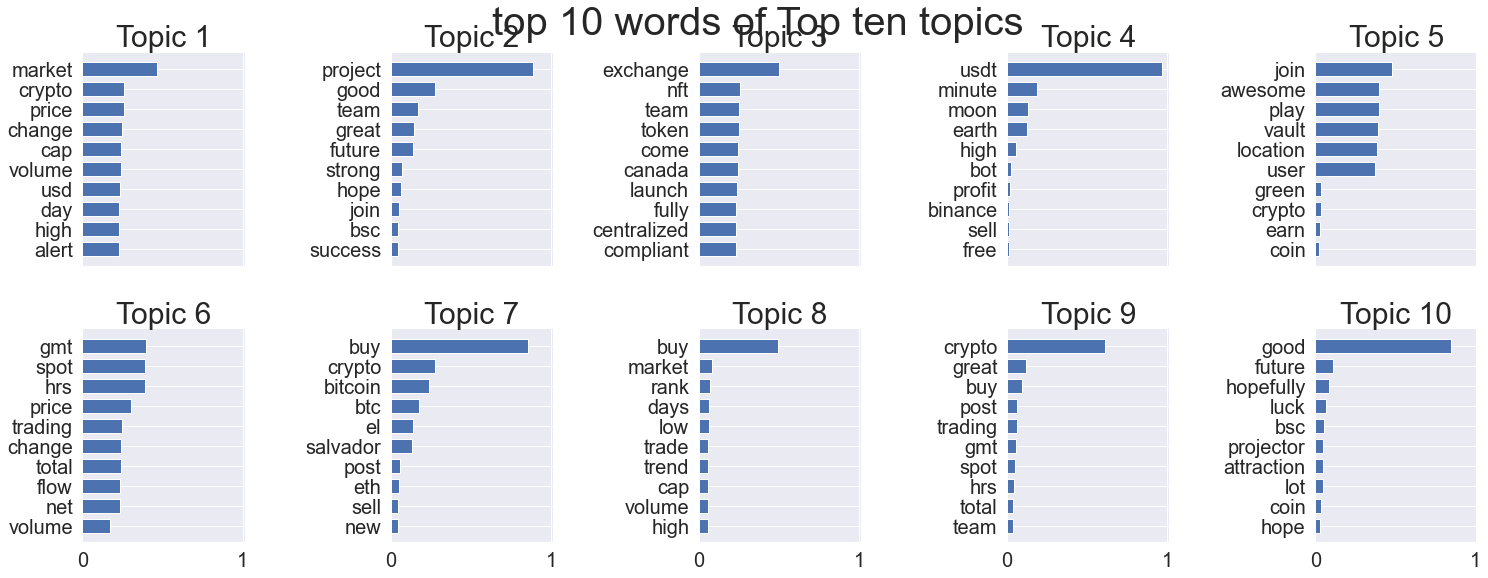

In [568]:
plot_top_words(svd, idx2word, 10, 'top 10 words of Top ten topics')

In [586]:
# by setting the threshold as 0.5, we filtered out several topic
selected_topics = top_10_words.iloc[:,(word_weight>0.5).sum(axis = 1)>=1]
selected_topics

,topic 1,topic 2,topic 3,topic 6,topic 8,topic 9
0,project,exchange,usdt,buy,crypto,good
1,good,nft,minute,crypto,great,future
2,team,team,moon,bitcoin,buy,hopefully
3,great,token,earth,btc,post,luck
4,future,come,high,el,trading,bsc
5,strong,canada,bot,salvador,gmt,projector
6,hope,launch,profit,post,spot,attraction
7,join,fully,binance,eth,hrs,lot
8,bsc,centralized,sell,sell,total,coin
9,success,compliant,free,new,team,hope


# NMF

In [570]:
# from sklearn.decomposition import NMF

# model_NMF = NMF(n_components=K, init='random', random_state=0)
# model_NMF.fit(X_bow)

# plot_top_words(model_NMF, idx2word, K, 'top 10 words of Top ten topics')


# LDA


In [571]:
# from sklearn.decomposition import LatentDirichletAllocation
# LDA = LatentDirichletAllocation(n_components=K, random_state=0)
# LDA.fit(X_bow)

# plot_top_words(LDA, idx2word, K, 'top 10 words of Top ten topics')


stage2

According to the above result, we choose the following keywords and topics

Topic 1: project


Topic 2: nft


Topic 3: crypto


Topic 4: usdt


Topic 5: bitcoin

In [587]:
# Change as needed
K = 20
word_frequency_threshold = 2
epochs = 50
lr = 0.01

In [588]:
from gensim.models.doc2vec import Doc2Vec
import gensim

model = Doc2Vec(vector_size=K, min_count=word_frequency_threshold, epochs=epochs)

In [589]:

def corpus_transform(corpus,tokens_only=False):
    for i,line in enumerate(corpus):
        tokens = gensim.utils.simple_preprocess(line)
        
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])
train_corpus =  list(corpus_transform(train_text))
model.build_vocab(train_corpus)

In [590]:
%%time
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 46.5 s, sys: 7.54 s, total: 54 s
Wall time: 43.7 s


In [591]:
# Template function
def calculate_similarity(selected_topics):
    sim_mat = []
    for i in range(selected_topics.shape[1]):
        tpc = selected_topics.iloc[:,i].tolist()
        doc_vector = model.infer_vector(tpc)
        sim = model.dv.most_similar([doc_vector],topn = len(train_corpus))
        # only select the similiarities
        sim = [x[1] for x in sim]
        sim_mat.append(sim)

    return np.array(sim_mat).T

In [592]:
sim_mat = calculate_similarity(selected_topics)

In [593]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(sim_mat)

In [594]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

<AxesSubplot:>

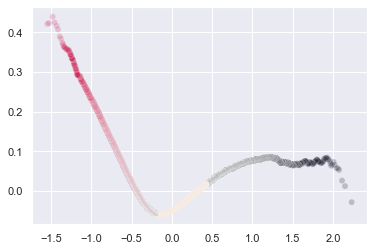

In [595]:
sim_mat_pca = pca.fit_transform(sim_mat)
sns.scatterplot(x = sim_mat_pca[:,0],y = sim_mat_pca[:,1],c = kmeans.labels_,alpha=0.2)

In [581]:
from sklearn.manifold import TSNE

In [582]:
sim_mat_tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(sim_mat)

<AxesSubplot:>

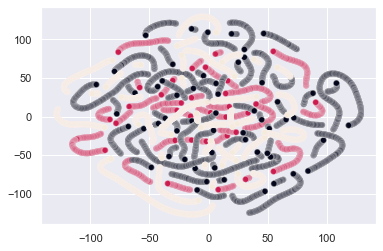

In [583]:
sim_mat_pca = pca.fit_transform(sim_mat)
sns.scatterplot(x = sim_mat_tsne[:,0],y = sim_mat_tsne[:,1],c = kmeans.labels_,alpha=0.2)

In [284]:
fig1 = plt.figure(figsize=(12, 12))
ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)

ax1.scatter(sim_mat[:,0],sim_mat[:,1],sim_mat[:,2], cmap="RdYlGn", edgecolor='k', s=200,c=kmeans.labels_)

(28084,)

## (10  pts) Task II: Evaluate your model by computing the most similar documents (tweets) to new (perhaps made up) tweets

In [48]:
# Template function
def find_similar_tweets(tweet, top_n=10):
    doc_vector = model.infer_vector(tweet)
    sims = model.dv.most_similar([doc_vector], topn=top_n)
    return sims

In [72]:
# Your code goes here
# tweet = ['Biden will win the selection']
topic1 = ["usdt gmt spot hrs cryptocapflow price trading change total volume"]
topic1 = ["project","airdrop",'good',"bsc","bitcoin","team",'airdropstario','great','future','blockchain']
sims_idx = find_similar_tweets(topic1,top_n=10)

print('The most similiarity:',sims_idx[1][1])
all_text[sims_idx[0][0]]

The most similiarity: 0.7959020137786865


'airdropstario good project hopefully future successful team cryptocurrency airdrop bsc bitcoin eth metaverseland mtland airdropstario'

In [69]:
pd.concat([TrainDF,TestDF]).iloc[31299,]['text']

'@rocketdoge_info Good project, dedicated team\r\n\r\n@zomchim4 \r\n@JoelAmani12 \r\n@okejohnson8 \r\n@UmeghaluO \r\n\r\n#cryptocurrency #Bitcoin #Airdrop #BSC #ROCKETDODGE'

## (10 pts extra credit) Task III: Produce a scatter plot of the compressed document embeddings (2D or 3D)

*Useful resources*:

* http://projector.tensorflow.org/

In [84]:
def save_matrix(matrix, fpath):
    D1, D2 = matrix.shape
    tsv = ""
    for i in range(D1):
        for j in range(D2):
            tsv += str(matrix[i, j]) + '\t'
        tsv = tsv.strip('\t') + '\n'
    tsv = tsv.strip('\n')
    with open(fpath, "w") as fd:
        fd.write(tsv)
        
def save_vocab(vocab: dict, fpath):
    tsv = ""
    for word, idx in sorted(vocab.items(), key=lambda item: item[1]):
        tsv += word + '\n'
    tsv = tsv.strip('\n')
    with open(fpath, "w") as fd:
        fd.write(tsv)

In [85]:
U = model.syn1neg
save_matrix(U, "580final_train_embeddings.tsv")

vocab = model.wv.key_to_index
save_vocab(vocab, "580final_train_vocab.tsv")

In [86]:
U.shape

(11603, 20)

In [95]:
model.syn1neg.shape

(11603, 20)

In [93]:
train_corpus[1]

TaggedDocument(words=['trend', 'crypto', 'alert', 'algorand', 'algo', 'trade', 'usd', 'price', 'change', 'day', 'high', 'day', 'low', 'volume', 'market', 'cap', 'market', 'rank', 'cryptocurrency', 'crypto'], tags=[1])

In [89]:
len(vocab)

11603